# Essentiel

In [ ]:
clean_notebook.ipynb

# Pré-requis

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import tqdm
from tqdm import tqdm_notebook

# Data

In [4]:
matrice_sbert = pd.read_csv('scores_matrix/matrix_sbert.csv')
matrice_sbert = matrice_sbert.drop('Unnamed: 0',axis=1)
matrice_syntax_postag = pd.read_csv('scores_matrix/matrix_syntax_postag.csv')
matrice_syntax_postag = matrice_syntax_postag.drop('Unnamed: 0',axis=1)
matrice_syntax_tree = pd.read_csv('scores_matrix/matrix_syntax_tree.csv')
matrice_syntax_tree = matrice_syntax_tree.drop('Unnamed: 0',axis=1)

In [13]:
with open("predictions/dev-labels.lst") as f:
    lineList_dev = f.readlines()
true_labels = [int(element.replace('\n','')) for element in lineList_dev]

with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels = [int(element.replace('\n', '')) for element in lineList_dev]

with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels_proba = [int(element.replace('\n', '')) for element in lineList_dev]

pred_probas = pd.read_csv('predictions/predictions_test_proba.csv',sep=';',header=None)

In [14]:
with open('data/xl/train_xl.jsonl', 'r') as f:
  a = list(f)

data_xl =[]
for element in a:
  data_xl.append(json.loads(element))

data_xl = pd.DataFrame(data_xl)

# Preprocessing

In [15]:
# Fonction pour pred_probas
def change_form(x):
    return [float(i) for i in x[2:-2].split()]

In [16]:
# Preprocessing pred_probas

pred_probas[1] = pred_probas[1].apply(change_form)
#pred_probas

In [8]:
# Fonctions pour df_labels

def for_df(x,y):
    if x==y:
        return 1
    else:
        return 0

def inv_softmax(probas,rp):
    return np.exp(rp)/(np.exp(probas[0])+np.exp(probas[1]))

def proba_for_good(true,list_prob):
    return list_prob[true-1]

In [17]:
# Construction de df_labels

df_labels = pd.DataFrame(np.transpose([true_labels,test_labels]),
                         columns=['true_labels','test_labels'])
df_labels['is_identical'] = df_labels.apply(lambda x: for_df(x.test_labels, x.true_labels), axis=1)
df_labels['max_sbert'] = list(matrice_sbert.max())
df_labels['mean_sbert'] = list(matrice_sbert.mean())
df_labels['max_postag'] = list(matrice_syntax_postag.max())
df_labels['mean_postag'] = list(matrice_syntax_postag.mean())
df_labels['max_tree'] = list(matrice_syntax_tree.max())
df_labels['mean_tree'] = list(matrice_syntax_tree.mean())
df_labels['both_probas'] = list(pred_probas[1])
df_labels['right_proba'] = df_labels.apply(lambda x: proba_for_good(x.true_labels, x.both_probas), axis=1)
df_labels['proba'] = df_labels.apply(lambda x: inv_softmax(x.both_probas,x.right_proba),axis=1)

In [19]:
df_labels.head()

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000


# Métriques séléctionnées :

- Distance cosinus appliquée à SBERT (métrique sémantique):
$$ \forall x,y \in \mathbb{R}^{758}_{SBERT emebdding}, dist = cos(x,y)$$
- Distance de jaccard appliquée à la représentation des phrases par des pos_tag
$$ \forall E_{1},E_{2} \in Combinaisons(postag), dist = jaccard(E_{1},E_{2}) $$
- DIstance de jaccard appliquée aux branches de la représentation des phrases par des arbres de dépendances
$$ \forall E_{1},E_{2} \in Branches_{dependency trees}, dist = jaccard(E_{1},E_{2}) $$

# Justification du choix des métriques

In [ ]:
for matrice,name in zip([matrice_sbert,matrice_syntax_tree,matrice_syntax_postag],
                   ['sbert','tree','postag']):



c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

decile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\14637119.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')


centile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

decile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\14637119.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')


centile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

decile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\14637119.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')


centile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


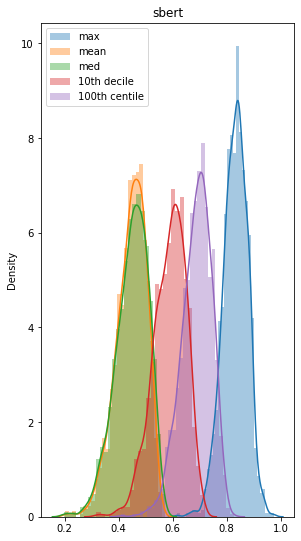

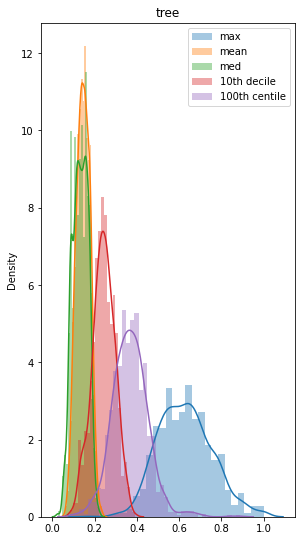

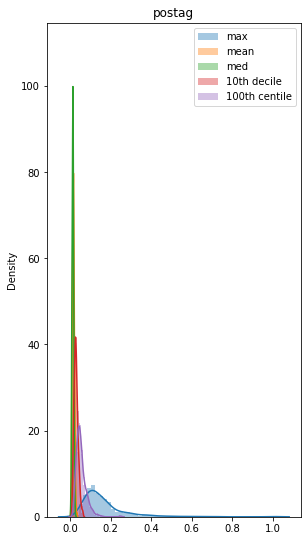

In [50]:
for matrice,i,title in zip([matrice_sbert,matrice_syntax_tree,matrice_syntax_postag],
                     range(1,4),
                     ['sbert','tree','postag']):
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,i)
    plt.title(title)
    sns.distplot(matrice.max(),label='max')
    sns.distplot(matrice.mean(),label='mean')
    sns.distplot(matrice.median(),label='med')
    sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/10)] for column in tqdm_notebook(list(matrice.columns),desc='decile')],label = '10th decile')
    sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')
    plt.legend()

In [29]:
matrice_sbert

,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266
0,0.316807,0.373840,0.530221,0.656162,0.530080,0.524673,0.299850,0.529248,0.474584,0.667774,...,0.267775,0.418164,0.362657,0.236048,0.281474,0.523898,0.533571,0.601892,0.563537,0.299001
1,0.384520,0.359550,0.435553,0.560183,0.431680,0.476730,0.396988,0.466997,0.427022,0.515475,...,0.214115,0.225793,0.434328,0.325097,0.360334,0.448217,0.445628,0.721007,0.514354,0.320239
2,0.338426,0.336966,0.470748,0.433693,0.671608,0.408010,0.365251,0.523279,0.419795,0.649816,...,0.303917,0.521256,0.283567,0.401653,0.508999,0.363738,0.441328,0.328512,0.620914,0.205880
3,0.390865,0.445105,0.378808,0.537232,0.693117,0.315308,0.398397,0.509811,0.474354,0.629071,...,0.453759,0.476446,0.353816,0.365195,0.480380,0.457613,0.498605,0.320132,0.472581,0.222268
4,0.370989,0.459286,0.536853,0.442257,0.653511,0.368366,0.358883,0.539318,0.402457,0.520190,...,0.523693,0.622484,0.259316,0.189285,0.285034,0.477385,0.421080,0.193486,0.478981,0.348717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40393,0.417160,0.417719,0.447479,0.434969,0.343598,0.403787,0.382739,0.538701,0.382461,0.515128,...,0.211823,0.361341,0.395037,0.325583,0.266692,0.495854,0.347716,0.488034,0.542663,0.303966
40394,0.346285,0.430337,0.439792,0.479797,0.613833,0.418358,0.315240,0.490273,0.544070,0.657689,...,0.521003,0.448324,0.360996,0.391185,0.422376,0.544460,0.524770,0.308476,0.550222,0.156705
40395,0.299576,0.424343,0.345456,0.430504,0.587999,0.441077,0.304973,0.478553,0.562934,0.603723,...,0.550680,0.334639,0.384586,0.375047,0.404286,0.566545,0.563403,0.302202,0.468538,0.131252
40396,0.585621,0.488470,0.494350,0.299411,0.256455,0.359927,0.706123,0.573355,0.431401,0.330731,...,0.358994,0.474422,0.470196,0.357181,0.368545,0.363726,0.215458,0.481326,0.418570,0.607034


In [126]:
temporaire

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
175,2,1,0,0.841404,0.433234,0.299213,0.018340,1.0,0.159084,"[0.0207787, 0.6304742]",0.630474,0.647871
219,2,1,0,0.824389,0.380451,0.710059,0.021437,1.0,0.210371,"[1.803195, 4.3178]",4.317800,0.925159
394,1,1,1,0.936929,0.488205,1.000000,0.016640,1.0,0.134084,"[15.710869, -15.17783]",15.710869,1.000000
639,1,1,1,0.794410,0.322347,0.297297,0.017843,1.0,0.183558,"[2.649105, -6.75763]",2.649105,0.999918
640,2,2,1,0.774122,0.235499,0.297297,0.017843,1.0,0.183558,"[13.632598, 14.61618]",14.616180,0.727818
712,1,1,1,0.927497,0.351525,0.324786,0.021846,1.0,0.169981,"[2.847211, -4.71948]",2.847211,0.999483
1059,1,1,1,0.892359,0.459039,1.000000,0.033709,1.0,0.137596,"[15.281895, -16.06415]",15.281895,1.000000
1096,2,1,0,0.937898,0.464726,0.625000,0.029053,1.0,0.207102,"[4.571521, -5.619384]",-5.619384,0.000038
1097,1,2,0,0.940131,0.460562,0.625000,0.029053,1.0,0.207102,"[10.186094, 2.24186]",10.186094,0.999645
1251,2,2,1,0.938100,0.430067,1.000000,0.033709,1.0,0.127644,"[16.053066, 15.634377]",15.634377,0.396831


In [148]:
step = 0.1
dico_01 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_01[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]


decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\334323

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\3343236192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\334323

In [149]:
step = 0.05
dico_005 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\256501

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\256501

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\2565018594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\256501

<Figure size 720x360 with 0 Axes>

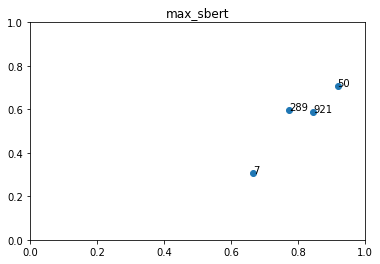

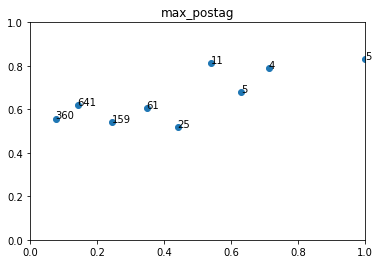

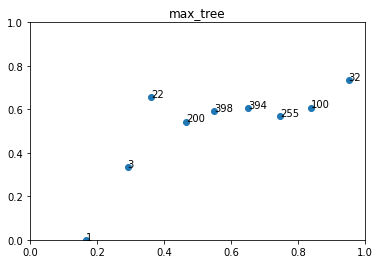

In [141]:
plt.figure(figsize=(10,5))
for metric,i in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    fig,ax=plt.subplots()
    plt.title(metric)
    plt.scatter([dico_01[metric][i].mean()[metric] for i in dico_01[metric]],[dico_01[metric][i].mean()['proba'] for i in dico_01[metric]])
    plt.xlim([0,1])
    plt.ylim([0,1])
    occ_per_range = [len(dico_01[metric][i]) for i in dico_01[metric]]
    for i, txt in enumerate(occ_per_range):
        ax.annotate(txt, ([dico_01[metric][i].mean()[metric] for i in dico_01[metric]][i], [dico_01[metric][i].mean()['proba'] for i in dico_01[metric]][i]))
    plt.show()

<Figure size 720x360 with 0 Axes>

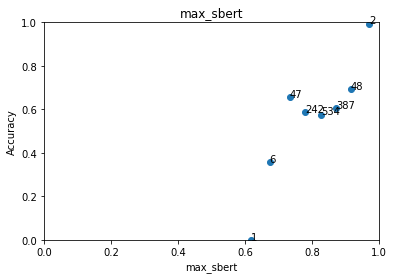

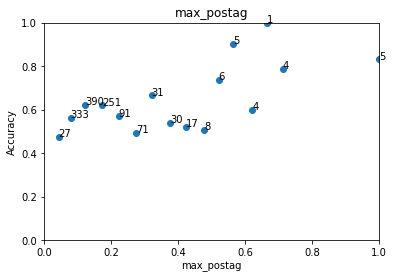

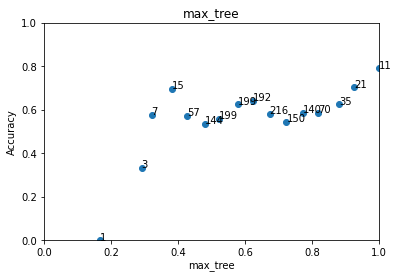

In [201]:
plt.figure(figsize=(10,5))
for metric,i in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    fig,ax=plt.subplots()
    plt.title(f"Accuracy moyenn pour des tranches d{metric}")
    plt.scatter([dico_005[metric][i].mean()[metric] for i in dico_005[metric]],[dico_005[metric][i].mean()['proba'] for i in dico_005[metric]])
    plt.xlabel(metric)
    plt.ylabel('Accuracy',fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    occ_per_range = [len(dico_005[metric][i]) for i in dico_005[metric]]
    for i, txt in enumerate(occ_per_range):
        ax.annotate(txt, ([dico_005[metric][i].mean()[metric] for i in dico_005[metric]][i], [dico_005[metric][i].mean()['proba'] for i in dico_005[metric]][i]))
    plt.show()

In [150]:
step = 0.05
dico_sup_005 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

In [151]:
step = 0.1
dico_sup_01 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_01[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

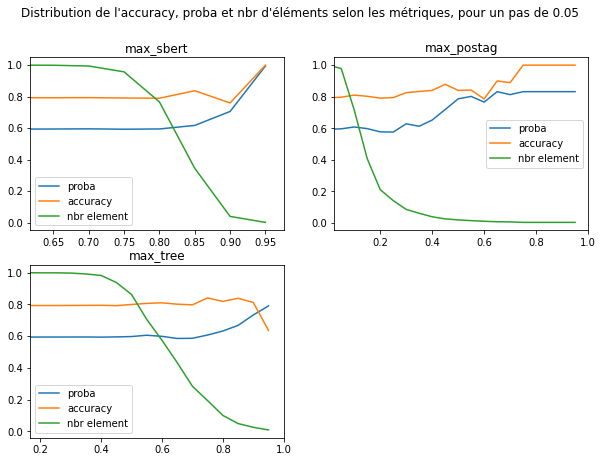

In [196]:
plt.figure(figsize=(10,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.05")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['proba'] for i in list(dico_sup_005[metric].keys())],label='proba')
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['is_identical'] for i in list(dico_sup_005[metric].keys())],label='accuracy')
    plt.plot(list(dico_sup_005[metric].keys()),
             [len(dico_sup_005[metric][i])/len(df_labels) for i in list(dico_sup_005[metric].keys())],label='nbr element')
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.legend()
    plt.title(metric)

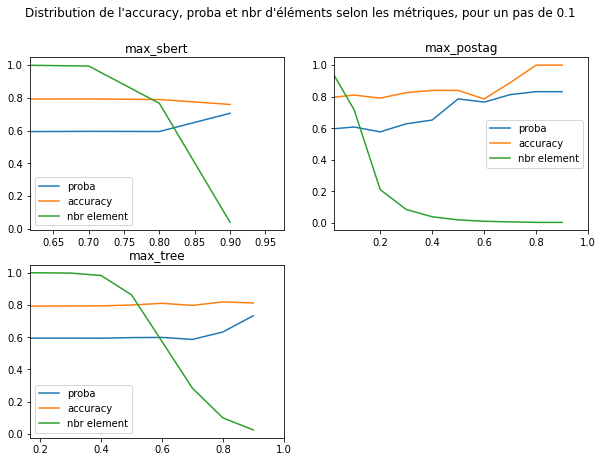

In [195]:
plt.figure(figsize=(10,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['proba'] for i in list(dico_sup_01[metric].keys())],label='proba')
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['is_identical'] for i in list(dico_sup_01[metric].keys())],label='accuracy')
    plt.plot(list(dico_sup_01[metric].keys()),
             [len(dico_sup_01[metric][i])/len(df_labels) for i in list(dico_sup_01[metric].keys())],label='nbr element')
    plt.legend()
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.title(metric)

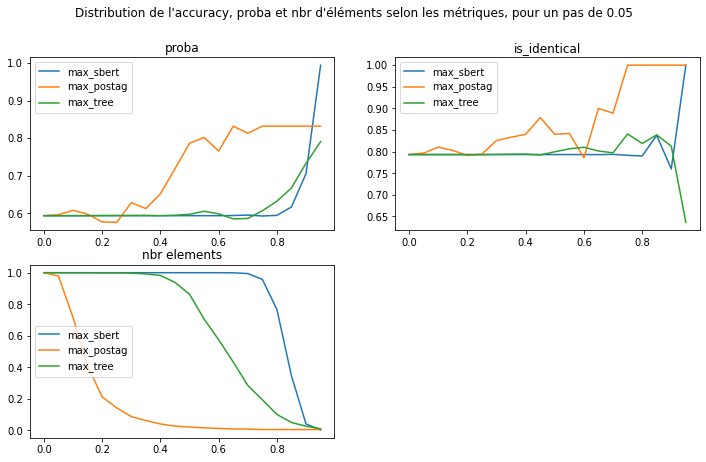

In [203]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.05")
for metric in ['max_sbert','max_postag','max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['proba'] for i in list(dico_sup_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['is_identical'] for i in list(dico_sup_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_005[metric].keys()),
             [len(dico_sup_005[metric][i])/len(df_labels) for i in list(dico_sup_005[metric].keys())],label=metric)
    plt.legend()

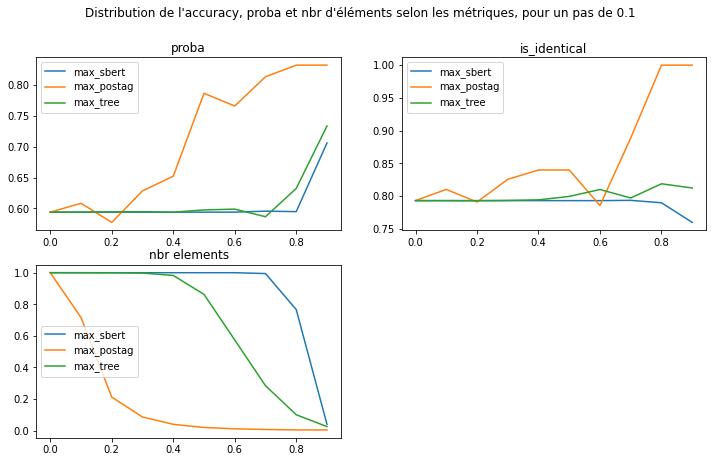

In [202]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric in ['max_sbert','max_postag','max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['proba'] for i in list(dico_sup_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['is_identical'] for i in list(dico_sup_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_01[metric].keys()),
             [len(dico_sup_01[metric][i])/len(df_labels) for i in list(dico_sup_01[metric].keys())],label=metric)
    plt.legend()

In [210]:
df_labels['cent_red_max_sbert'] = (df_labels['max_sbert'] - df_labels.mean()['max_sbert'])/ df_labels.std()['max_sbert']
df_labels['cent_red_max_postag'] = (df_labels['max_postag'] - df_labels.mean()['max_postag'])/ df_labels.std()['max_postag']
df_labels['cent_red_max_tree'] = (df_labels['max_tree'] - df_labels.mean()['max_tree'])/ df_labels.std()['max_tree']

C:\Users\marti\AppData\Local\Temp\ipykernel_11604\886551607.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_labels['cent_red_max_sbert'] = (df_labels['max_sbert'] - df_labels.mean()['max_sbert'])/ df_labels.std()['max_sbert']
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\886551607.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_labels['cent_red_max_postag'] = (df_labels['max_postag'] - df_labels.mean()['max_postag'])/ df_labels.std()['max_postag']
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\886551607.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future ve

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

<AxesSubplot:xlabel='cent_red_max_postag', ylabel='Density'>

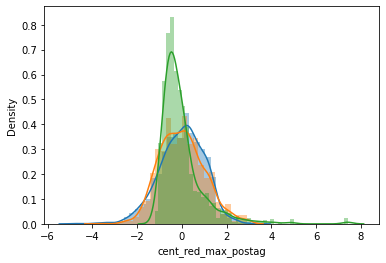

In [211]:
sns.distplot(df_labels['cent_red_max_sbert'])
sns.distplot(df_labels['cent_red_max_tree'])
sns.distplot(df_labels['cent_red_max_postag'])

In [220]:
step = 0.1
dico_sup_cr_01 = {}
decoupage = [round(-7.5 + 15*i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['cent_red_max_sbert',
                                  'cent_red_max_postag','cent_red_max_tree'],
                                 desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_cr_01[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

In [222]:
step = 0.05
dico_sup_cr_005 = {}
decoupage = [round(-7.5 + 15*i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['cent_red_max_sbert',
                                  'cent_red_max_postag','cent_red_max_tree'],
                                 desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_cr_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

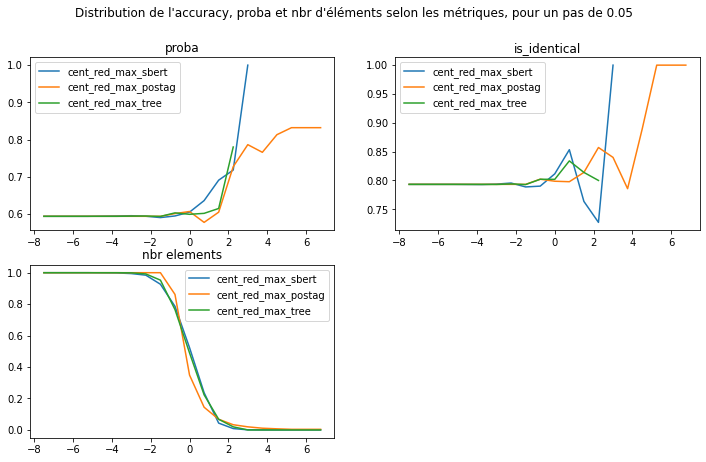

In [223]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.05")
for metric in ['cent_red_max_sbert','cent_red_max_postag','cent_red_max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_005[metric].keys()),
             [dico_sup_cr_005[metric][i].mean()['proba'] for i in list(dico_sup_cr_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_005[metric].keys()),
             [dico_sup_cr_005[metric][i].mean()['is_identical'] for i in list(dico_sup_cr_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_005[metric].keys()),
             [len(dico_sup_cr_005[metric][i])/len(df_labels) for i in list(dico_sup_cr_005[metric].keys())],label=metric)
    plt.legend()

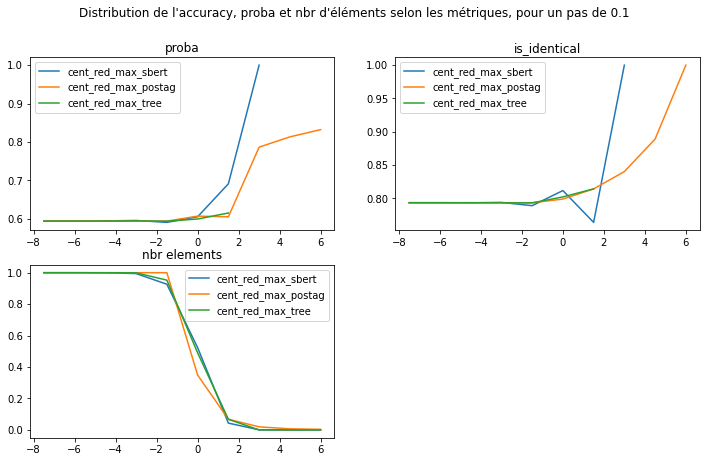

In [221]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric in ['cent_red_max_sbert','cent_red_max_postag','cent_red_max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_01[metric].keys()),
             [dico_sup_cr_01[metric][i].mean()['proba'] for i in list(dico_sup_cr_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_01[metric].keys()),
             [dico_sup_cr_01[metric][i].mean()['is_identical'] for i in list(dico_sup_cr_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_01[metric].keys()),
             [len(dico_sup_cr_01[metric][i])/len(df_labels) for i in list(dico_sup_cr_01[metric].keys())],label=metric)
    plt.legend()